<a href="https://colab.research.google.com/github/maximematerno/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

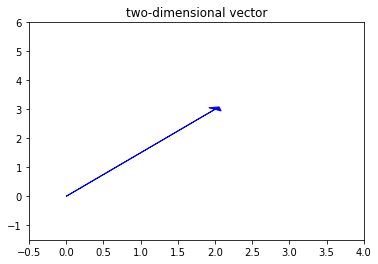

In [0]:
import matplotlib.pyplot as plt
import numpy as np

blue_2d = [2,3]
blue_2d= np.array(blue_2d)
 
plt.arrow(0,0, 2,3, head_width=0.2, head_length=0.1, color='b')

plt.ylim([-1.5,6])
plt.xlim([-0.5,4])
plt.title('two-dimensional vector')

plt.show()

## 1.2 Create a three-dimensional vecor and plot it on a graph

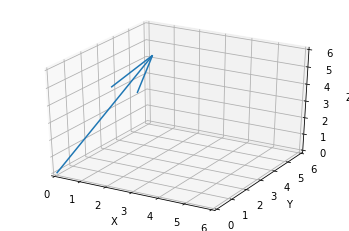

In [0]:
from mpl_toolkits.mplot3d import Axes3D


red_3d = [2,3,6]
red_3d= np.array(red_3d)
 

v_3d=np.array([2,3,6])
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,2,3,6, length=1);
ax.set_xlim([0,6])
ax.set_ylim([0,6])
ax.set_zlim([0,6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [0]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


[10 15]
[6.28318531 9.42477796]
[-5.43656366 -8.15484549]


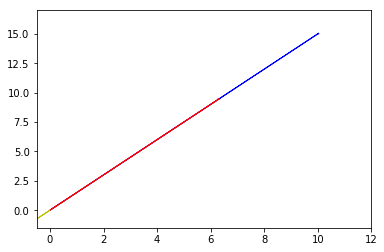

In [0]:
import math

blue = np.multiply(5,blue_2d)
red = np.multiply(math.pi, blue_2d)
yellow = np.multiply(-math.e, blue_2d)

print(blue)
print(red)
print(yellow)

plt.arrow(0,0,blue[0],blue[1], head_width=0.07, head_length=0.07, color='b')
plt.arrow(0,0,red[0],red[1], head_width=0.07, head_length=0.07, color='r')
plt.arrow(0,0,yellow[0],yellow[1], head_width=0.07, head_length=0.07, color='y')

plt.ylim([-1.5,17])
plt.xlim([-0.5,12])


plt.show()

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

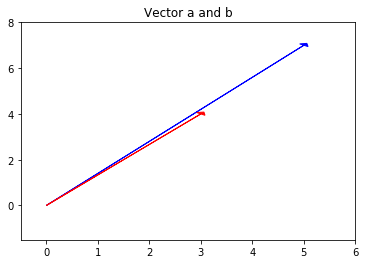

In [0]:
a = [5,7]
b = [3,4]

a = np.array(a)
b = np.array(b)


plt.arrow(0,0, 5,7, head_width=0.2, head_length=0.1, color='b')
plt.arrow(0,0, 3,4, head_width=0.2, head_length=0.1, color='r')




plt.ylim([-1.5,8])
plt.xlim([-0.5,6])
plt.title('Vector a and b')

plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

In [0]:
sub_a_b=np.subtract(a,b)
sub_a_b

array([2, 3])

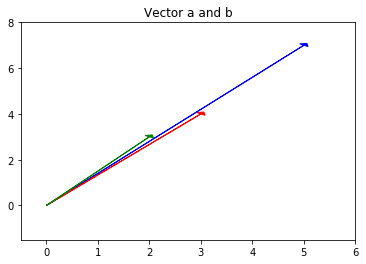

In [0]:
a = [5,7]
b = [3,4]

plt.arrow(0,0, 5,7, head_width=0.2, head_length=0.1, color='b')
plt.arrow(0,0, 3,4, head_width=0.2, head_length=0.1, color='r')

plt.arrow(0,0, 2,3, head_width=0.2, head_length=0.1, color='g')



plt.ylim([-1.5,8])
plt.xlim([-0.5,6])
plt.title('Vector a and b')

plt.show()

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
c =[7,22,4,16]
d =[12,6,2,9]

c = np.array(c)
d = np.array(d)

c_d=np.dot(c,d)
c_d

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [0]:
e =[5,7,2]
f =[3,4,6]

e = np.array(e)
f = np.array(f)


e_f=np.cross(e,f)
e_f

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [0]:
g = [1,1,1,8]
h = [3,3,3,3]

g = np.array(g)
h = np.array(h)

norm_g=np.linalg.norm(g)
norm_h=np.linalg.norm(h)
print(norm_g)
norm_h

8.18535277187245


6.0

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
# A is(3x2)
# B is(3x1)
# C is(2x3)
# D is(3x3)
# E is(2x2)
# we can multiply: A x C, A x E , C x A, D x A, D x B, E x C, C x D



## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [0]:
A=[[1,2],[3,4],[5,6]]
A = np.array(A)


B = [2,4,6] 
B=np.array(B)

C = [[9,6,3],[4,7,11]]
C=np.array(C)

D = [[1,0,0],[0,1,0],[0,0,1]]
D=np.array(D)
E= [[1,3],[5,7]]
E=np.array(E)

CD=np.matmul(C,D)
print('Mx(3x2) AE: ',CD)

AE=np.matmul(A, E)
print('Mx(2x3) CD: ',AE)

BA=np.matmul(B, A)
print('Mx(1*2) BA:' , BA
     )

Mx(3x2) AE:  [[ 9  6  3]
 [ 4  7 11]]
Mx(2x3) CD:  [[11 17]
 [23 37]
 [35 57]]
Mx(1*2) BA: [44 56]


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [0]:
F = [[20,19,18,17],[16,15,14,13],[12,11,10,9],[8,7,6,5],[4,3,2,1]]
F = np.array(F)

F_transpose= np.transpose(F)
F_transpose

# F and F_transpose diagonal number [20,5] are the same, and dimension is (5 x 4) for F and (4 x 5) for F_transpose

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:

G = np.array([[12,11],[7,10]])
I=np.array([[1,0],[0,1]])
IG= np.matmul(I, G)
IG

array([[12, 11],
       [ 7, 10]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
H= [[12,11],[7,10]]
h= np.array(H)

J = [[0,1,2], [7,10,4],[3,2,0]]
J = np.array(J)

H_determinant=np.linalg.det(H)

print('H determinant:', H_determinant)

J_determinant= np.linalg.det(J)

print('J determinant:', J_determinant)

H determinant: 43.000000000000014
J determinant: -19.999999999999996


## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [0]:
H_inverse= np.linalg.inv(H)

print('H inverse:', H_inverse)

J_inverse= np.linalg.inv(J)

print('J inverse:', J_inverse)

H inverse: [[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
J inverse: [[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [0]:
H_inverseH= np.matmul(H, inv_H)
H_inverseH=H_inverseH.astype(int)
print('multiplication of H and inverse H:', H_inverseH)
inverseJ_J= np.matmul(inv_J, J)
inverseJ_J = inverseJ_J.astype(int)
print('multiplication inverse J and J:', inverseJ_J)

#they are not equal, different dimension

multiplication of H and inverse H: [[1 0]
 [0 1]]
multiplication inverse J and J: [[1 0 0]
 [0 0 0]
 [0 0 1]]


# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

